In [1]:
from keras.models import load_model
!pip install mtcnn
# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

import numpy as np
from mtcnn.mtcnn import MTCNN
from numpy import asarray
#!pip install pycocotools
import io
import os
from pycocotools.coco import COCO
from PIL import Image
import matplotlib.pyplot as plt


# Simple python package to shut up Tensorflow warnings and logs.
!pip install silence_tensorflow
import silence_tensorflow.auto

2022-11-29 19:08:04.558915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-29 19:08:04.705932: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-29 19:08:04.705983: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-29 19:08:05.571771: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

0.1.0


In [ ]:
#set up folders for extracted faces and the corresponding captions 
# initialize COCO API for instance annotations
import os
dataDir = './'

image_folder = "extracted_eyes"

savedirimage = dataDir +  image_folder + "/"


if not os.path.exists(savedirimage):
	os.makedirs(savedirimage)

In [ ]:
# extract eyes from extracted_face_image
def extract_eyes_from_extratced_face(filename, index, required_size = (300,100),left_eye_corner = 20, right_eye_corner = 230):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    if len(results)>=1:
        left_right_eye_x_diff = results[0]['keypoints']['right_eye'][0] - results[0]['keypoints']['left_eye'][0] 
        left_right_eye_y_diff = abs(results[0]['keypoints']['right_eye'][1] - results[0]['keypoints']['left_eye'][1]) 
    else:
        return False
    # extract the bounding box from the first face
    if left_right_eye_x_diff>=100 and left_right_eye_y_diff < 8:
        #print(results[0])
        xeye = left_eye_corner
        yeye = int((results[0]['keypoints']['left_eye'][1]+results[0]['keypoints']['right_eye'][1])/2 -10)
        width = right_eye_corner
        height = int((yeye+results[0]['keypoints']['nose'][1])/2)
        eyes = pixels[yeye:height, xeye:width]
        # resize pixels to the model size
        image = Image.fromarray(eyes)
        image = image.resize(required_size)
        eyes_array = np.asarray(image)
        #plt.imshow(eyes_array)
        plt.imsave(os.path.join(savedirimage, 'eyes_img_{}.jpg'.format(index)),eyes_array)
        return True
    return False

In [ ]:
files = os.listdir('../extracted_faces_from_COCO/')

In [ ]:
len(files)

In [ ]:
index =0
for file in files:
    if extract_eyes_from_extratced_face(os.path.join('../extracted_faces_from_COCO/',file), index = index):
        print(index)
        index+=1

In [2]:
# extract eyes from extracted_face_image
def extract_eyes_from_extratced_face_GFW(filename, index, required_size = (300,100)):
    # load image from file
    image = Image.open(filename)
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)
    if len(results)>=1:
        left_right_eye_x_diff = results[0]['keypoints']['right_eye'][0] - results[0]['keypoints']['left_eye'][0] 
        left_right_eye_y_diff = abs(results[0]['keypoints']['right_eye'][1] - results[0]['keypoints']['left_eye'][1]) 
    else:
        return False
    # extract the bounding box from the first face
    if left_right_eye_x_diff>=25 and left_right_eye_y_diff < 4:
        #print(results[0])
        xeye = 5
        yeye = int((results[0]['keypoints']['left_eye'][1]+results[0]['keypoints']['right_eye'][1])/2 -10)
        width = 95
        height = int((yeye+results[0]['keypoints']['nose'][1])/2)
        eyes = pixels[yeye:height, xeye:width]
        # resize pixels to the model size
        image = Image.fromarray(eyes)
        image = image.resize(required_size)
        eyes_array = np.asarray(image)
        #plt.imshow(eyes_array)
        plt.imsave(os.path.join(savedirimage, 'eyes_img_{}.jpg'.format(index)),eyes_array)
        return True
    return False

In [3]:
#set up folders for extracted faces and the corresponding captions 
# initialize COCO API for instance annotations
import os
dataDir = './'

image_folder = "extracted_real_eyes_GFW"

savedirimage = dataDir +  image_folder + "/"


if not os.path.exists(savedirimage):
	os.makedirs(savedirimage)

In [4]:
files = os.listdir('GFW/real_faces/')

In [5]:
len(files)

30000

In [ ]:
index =1001
for i in range(25000, len(files)):
    if extract_eyes_from_extratced_face_GFW(os.path.join('GFW/real_faces/',files[i]), index = index):
        print("------------" + str(i) + "-----------")
        index+=1

2022-11-29 19:08:12.884740: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/xiaona/anaconda3/envs/paddle_env/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-29 19:08:12.884899: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/xiaona/anaconda3/envs/paddle_env/lib/python3.8/site-packages/cv2/../../lib64:
2022-11-29 19:08:12.885025: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/xiaona/anaconda3/envs/paddle_env/lib/python3.8/

1/1 [==============================] - 0s 131ms/step
------------25002-----------
1/1 [==============================] - 0s 130ms/step
------------25009-----------
1/1 [==============================] - 0s 150ms/step
------------25012-----------
1/1 [==============================] - 0s 145ms/step
------------25016-----------
1/1 [==============================] - 0s 131ms/step
------------25019-----------
1/1 [==============================] - 0s 143ms/step
------------25020-----------
1/1 [==============================] - 0s 128ms/step
------------25021-----------
1/1 [==============================] - 0s 88ms/step


1/1 [==============================] - 0s 132ms/step
------------25022-----------
1/1 [==============================] - 0s 128ms/step
------------25026-----------
1/1 [==============================] - 0s 134ms/step
------------25027-----------
1/1 [==============================] - 0s 126ms/step
------------25030-----------
1/1 [==============================] - 0s 133ms/step
------------25035-----------
1/1 [==============================] - 0s 126ms/step
------------25040-----------
1/1 [==============================] - 0s 134ms/step
------------25041-----------
1/1 [==============================] - 0s 149ms/step
------------25042-----------
1/1 [==============================] - 0s 142ms/step
------------25043-----------


1/1 [==============================] - 0s 135ms/step
------------25045-----------
1/1 [==============================] - 0s 131ms/step
------------25048-----------
1/1 [==============================] - 0s 125ms/step
------------25049-----------
1/1 [==============================] - 0s 133ms/step
------------25053-----------
1/1 [==============================] - 0s 124ms/step
------------25058-----------
1/1 [==============================] - 0s 127ms/step
------------25059-----------
1/1 [==============================] - 0s 138ms/step
------------25062-----------
1/1 [==============================] - 0s 135ms/step
------------25063-----------
1/1 [==============================] - 0s 28ms/step


1/1 [==============================] - 0s 129ms/step
------------25067-----------
1/1 [==============================] - 0s 125ms/step
------------25070-----------
1/1 [==============================] - 0s 189ms/step
------------25074-----------
1/1 [==============================] - 0s 132ms/step
------------25075-----------
1/1 [==============================] - 0s 142ms/step
------------25077-----------
1/1 [==============================] - 0s 124ms/step
------------25078-----------
1/1 [==============================] - 0s 173ms/step
------------25080-----------
1/1 [==============================] - 0s 183ms/step
------------25081-----------
1/1 [==============================] - 0s 128ms/step
------------25085-----------
1/1 [==============================] - 0s 126ms/step


In [11]:
    image = Image.open(os.path.join('GFW/real_faces/', files[2999]))
    # convert to RGB, if needed
    image = image.convert('RGB')
    # convert to array
    pixels = np.asarray(image)
    # create the detector, using default weights
    detector = MTCNN()
    # detect faces in the image
    results = detector.detect_faces(pixels)

1/1 [==============================] - 0s 141ms/step


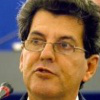

In [12]:
image.show()

In [13]:
results

[{'box': [23, 14, 57, 77],
  'confidence': 0.9994707703590393,
  'keypoints': {'left_eye': (37, 41),
   'right_eye': (63, 45),
   'nose': (45, 55),
   'mouth_left': (33, 71),
   'mouth_right': (55, 74)}}]